In [1]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
    return signal

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream

signal = p300subject25['data'][0][0][0]    
df_signal = a_fun.to_df(signal)

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

A continuación, grafico las dos señales a trabajar: signal y flash.  

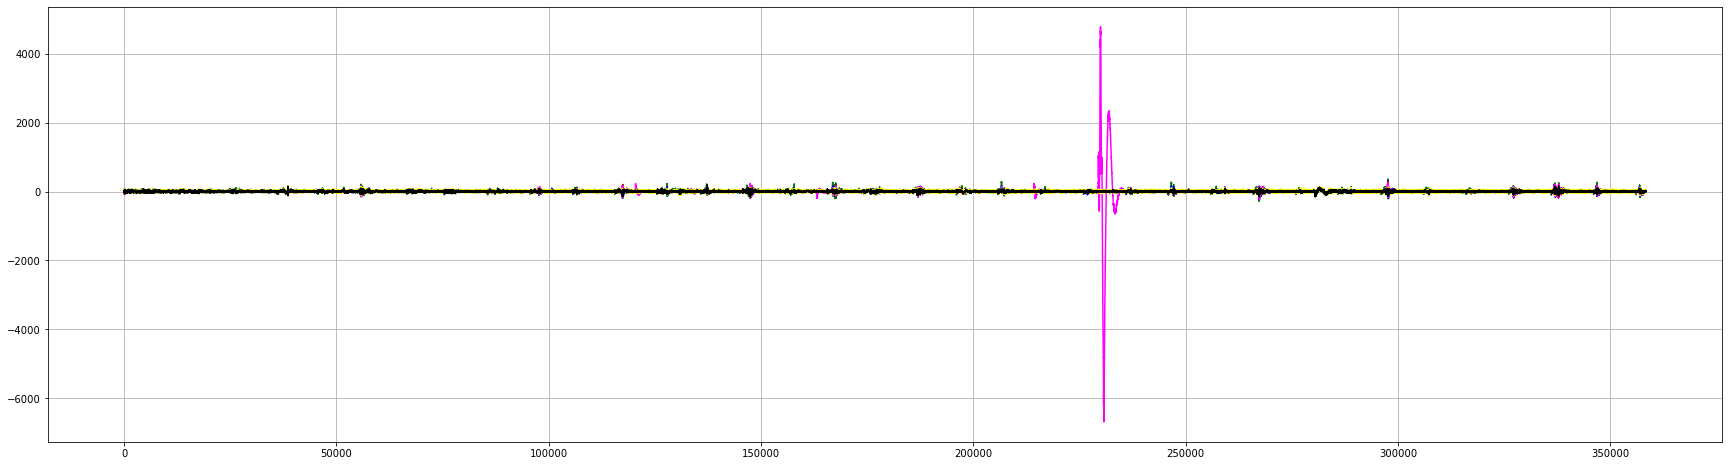

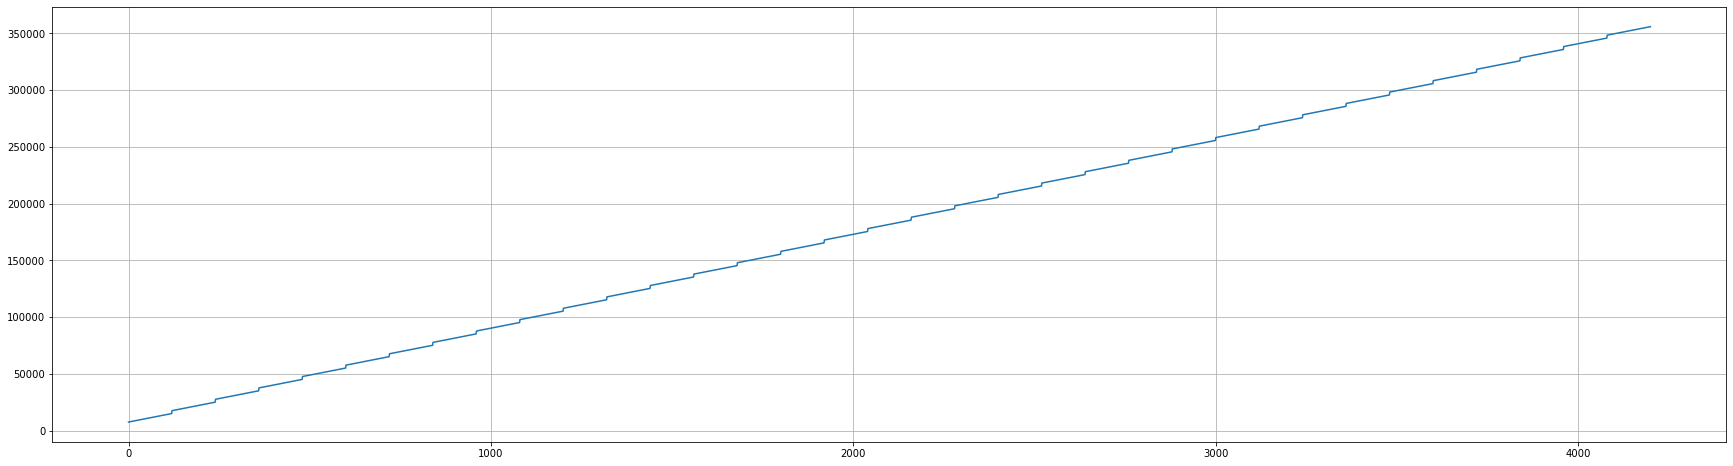

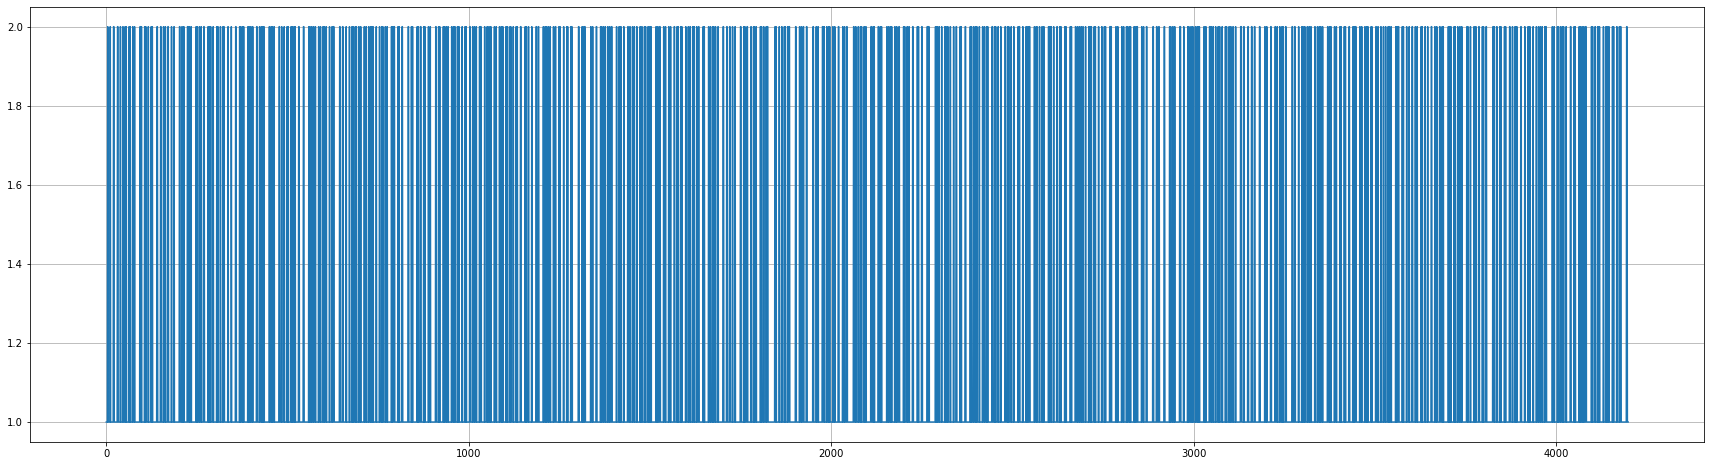

(None, None)

In [2]:
plt.figure(figsize=(30,8))                                     
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[0])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[3])
plt.grid(), plt.show()

En la siguiente gráfica modifico el erptemplate1 multiplicándolo por 1000 dentro de la función DrugSignal_ALEX.  
El objetivo es visualizar en dónde afecta la señal.    
Se detecta que el rango afectado es entre 0 y 50ms.  
Para la gráfica de DrigSignal veo en un rango pequeño: plt.xlim([7500,15500]), plt.ylim([-5500,6800]).  
En ése mismo rango, signal es de muy baja amplitud.  

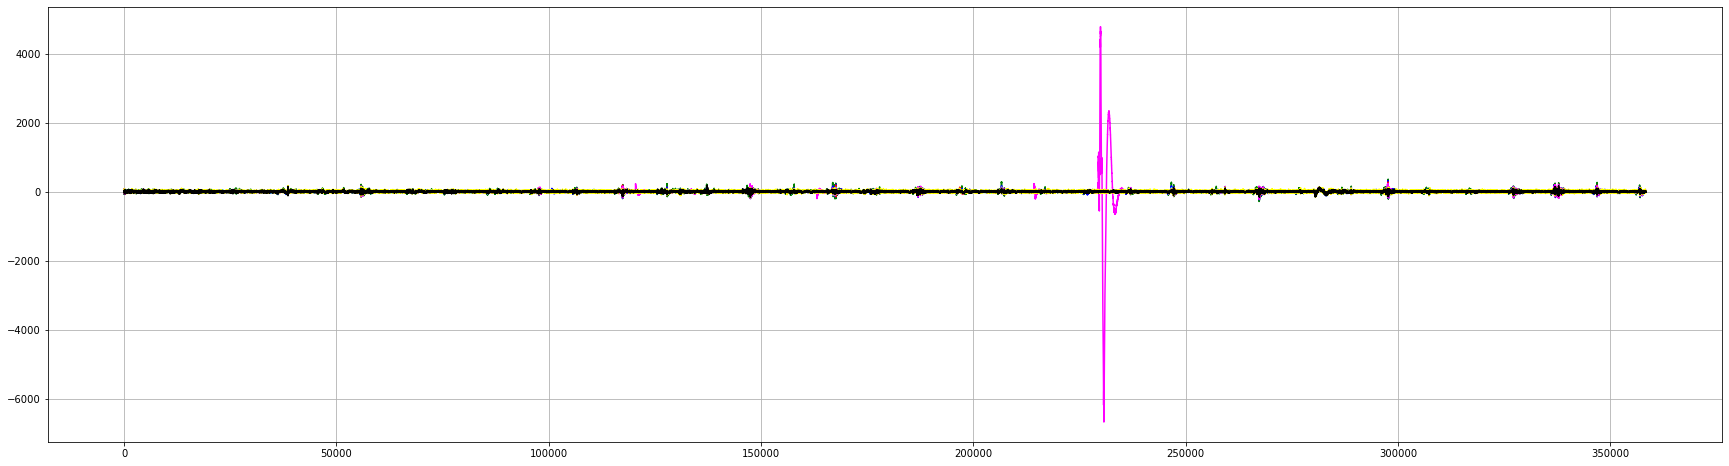

(None, None)

In [3]:
#-----------------------------------------------------------------------
# Modificaciones de DrugSignal para analizar el comportamiento
#-----------------------------------------------------------------------
signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)

plt.figure(figsize=(30,8))                                      # DrugSignal
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()